# Extrovert vs. Introvert Behavior Data

**About the Dataset**

[Extrovert vs. Introvert Behavior Data](https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data?select=personality_dataset.csv)

* Features:

1. **Time_spent_Alone**: Hours spent alone daily (0–11).
2. **Stage_fear**: Presence of stage fright (Yes/No).
3. **Social_event_attendance**: Frequency of social events (0–10).
4. **Going_outside**: Frequency of going outside (0–7).
5. **Drained_after_socializing**: Feeling drained after socializing (Yes/No).
6. **Friends_circle_size**: Number of close friends (0–15).
7. **Post_frequency**: Social media post frequency (0–10).
8. **Personality**: Target variable (Extrovert/Introvert).*


## EDA

In [155]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Loading data
personality_df = pd.read_csv("./kaggle_datasets/personality_dataset.csv")
personality_df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [157]:
# Checking dataset dimension
personality_df.shape

(2900, 8)

In [158]:
# Verifying if there are null values
personality_df.isna().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [159]:
# Calculating 5% threshold
threshold = len(personality_df) * 0.05

# Filtering columns with 5% missing values or less
cols_to_drop = personality_df.columns[personality_df.isna().sum() <= threshold]

# Dropping missing values below the threshold
personality_df.dropna(subset=cols_to_drop, inplace=True)

# Checking remaining missing values
personality_df.isna().sum()


Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [160]:
# Validating new dimensions without missing values
personality_df.shape

(2477, 8)

In [161]:
# Validating data types
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


In [162]:
# Transforming numeric data to integers
for column, df in personality_df.items():
    if personality_df[column].dtype == "float":
        personality_df[column] = personality_df[column].astype("int")

# Validating transformation
personality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Time_spent_Alone           2477 non-null   int64 
 1   Stage_fear                 2477 non-null   object
 2   Social_event_attendance    2477 non-null   int64 
 3   Going_outside              2477 non-null   int64 
 4   Drained_after_socializing  2477 non-null   object
 5   Friends_circle_size        2477 non-null   int64 
 6   Post_frequency             2477 non-null   int64 
 7   Personality                2477 non-null   object
dtypes: int64(5), object(3)
memory usage: 174.2+ KB


In [163]:
# Calculating descriptive statistics
personality_df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2477.000000,2477.000000,2477.000000,2477.000000,2477.000000
mean,4.522406,3.939039,3.013726,6.239806,3.559548
std,3.491162,2.900044,2.257239,4.311365,2.927397
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [164]:
# Exploring categorical variables
for column, df in personality_df.items():
    if personality_df[column].dtype == "O":
        print(personality_df[column].value_counts(ascending=False, normalize=True))

Stage_fear
No     0.501009
Yes    0.498991
Name: proportion, dtype: float64
Drained_after_socializing
No     0.501009
Yes    0.498991
Name: proportion, dtype: float64
Personality
Extrovert    0.514332
Introvert    0.485668
Name: proportion, dtype: float64


In [165]:
def hist_plots(axes, x, xlabel, title=None):
    # Creating plot
    axes.hist(x)

    # Setting labels and title
    axes.set_xlabel(xlabel)
    axes.set_ylabel("# of observations")
    axes.set_title(title)
    
    # Marking mean and median
    axes.axvline(x.mean(), color="red", linestyle="--", label="mean")
    axes.axvline(x.median(), color="black", linestyle="--", label="median")
    axes.legend()
    
    # Grid
    axes.grid()


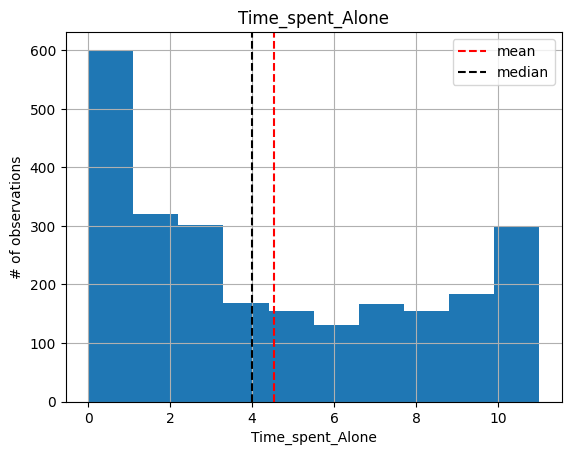

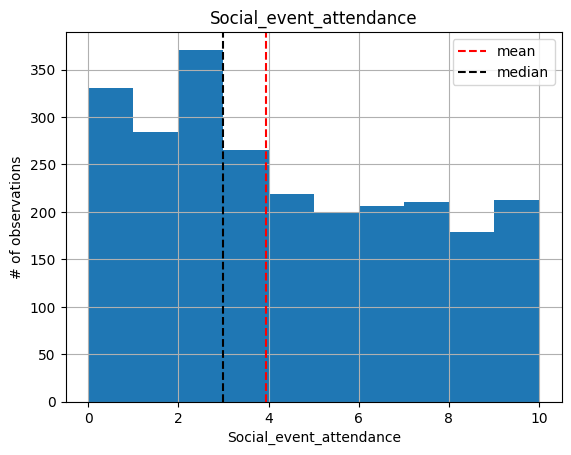

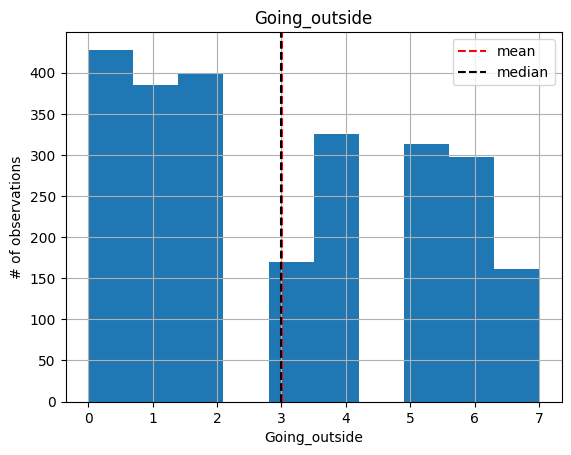

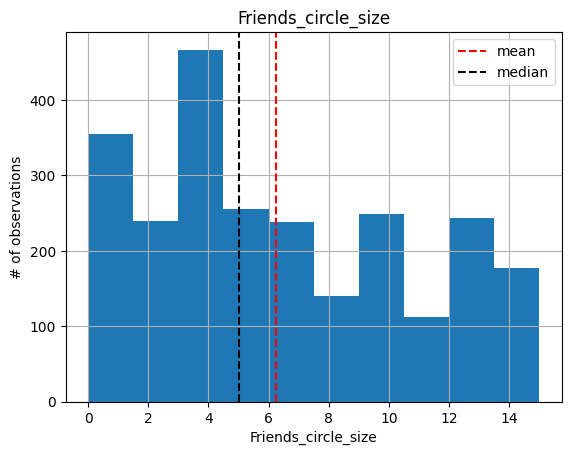

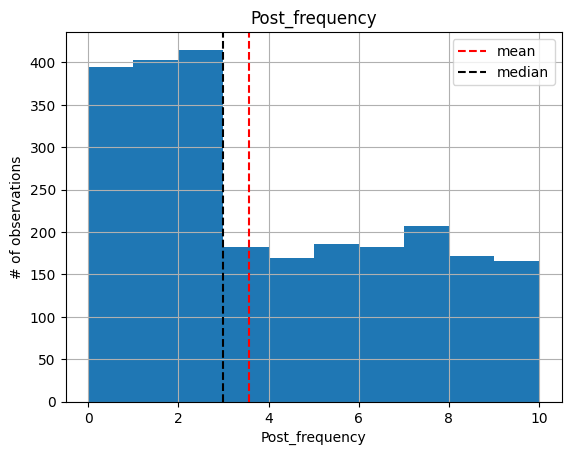

In [166]:
for column, df in personality_df.items():
    if personality_df[column].dtype == "int":
        fig, ax = plt.subplots()
        hist_plots(ax,personality_df[column],column,title=column)
        plt.show()

In [167]:
# Exploring relationship between target variable and drained after socializing
pd.crosstab(personality_df["Personality"], personality_df["Drained_after_socializing"])

Drained_after_socializing,No,Yes
Personality,,
Extrovert,1165,109
Introvert,76,1127


In [168]:
# Exploring relationship between target variable and stage fear
pd.crosstab(personality_df["Personality"], personality_df["Stage_fear"])

Stage_fear,No,Yes
Personality,,
Extrovert,1165,109
Introvert,76,1127


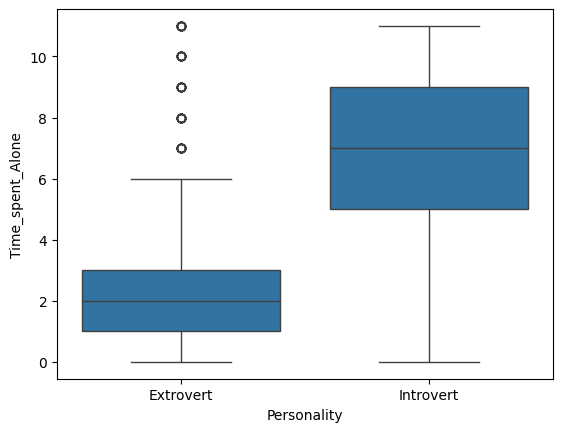

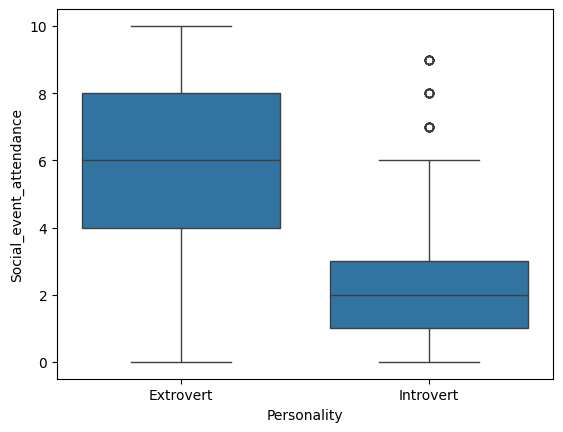

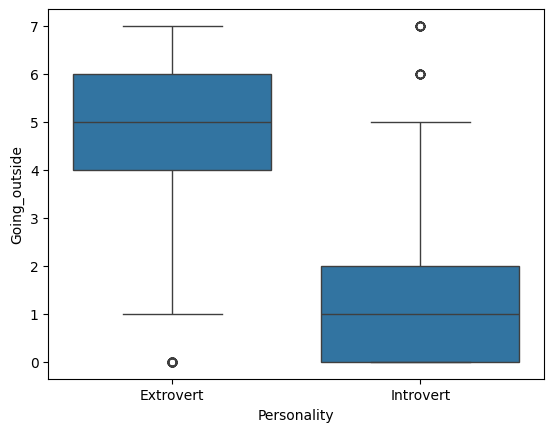

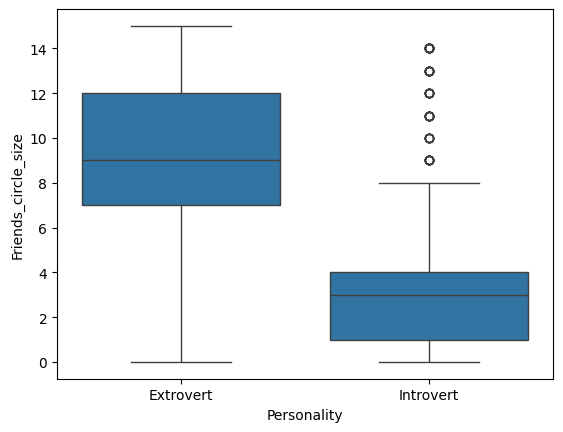

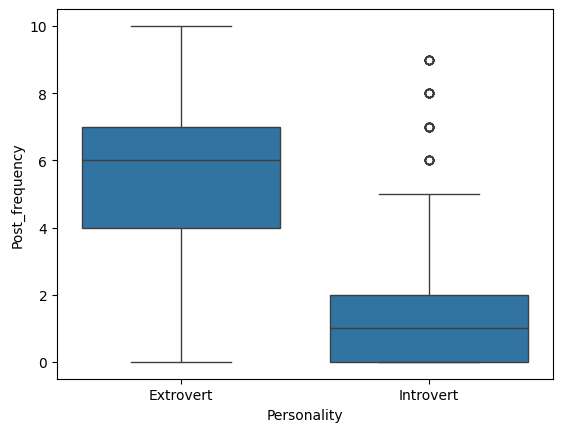

In [169]:
for column, df in personality_df.items():
    if personality_df[column].dtype == "int":
       sns.boxplot(data=personality_df, x="Personality", y=column)
       plt.show()

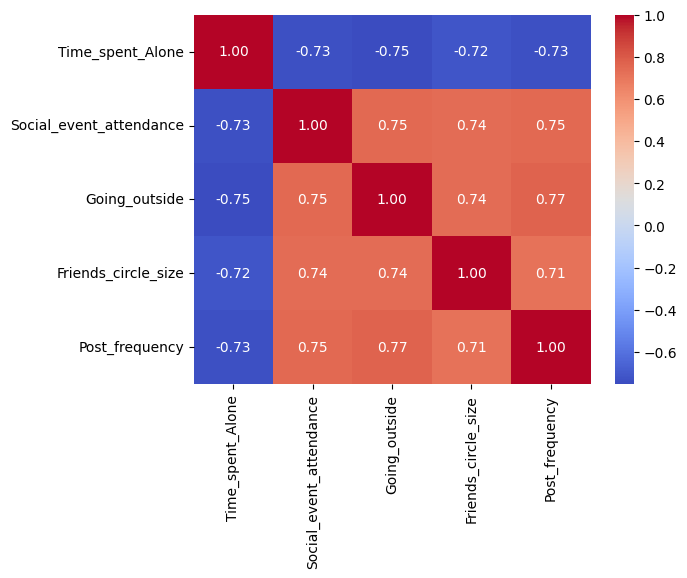

In [170]:
# Calculating correlations
personality_correlations = personality_df.select_dtypes("number").corr()

# Visualizing correlations
sns.heatmap(personality_correlations, cmap="coolwarm", fmt=".2f", annot=True)
plt.show()

## Data preprocessing

In [171]:
#Importing modules 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [172]:
# Separating target variable
y = personality_df["Personality"]

# Separating categorical variables
personality_df_cat = personality_df.select_dtypes("object").drop("Personality", axis=1)

# Separating numerical variables
personality_df_num = personality_df.select_dtypes("number")


In [173]:
# Creating dictionaries to transform variables to numeric
yes_no = {"No": 0, "Yes": 1}
extro_intro = {"Introvert": 0, "Extrovert": 1}

# Transforming variables
y = y.map(extro_intro)
personality_df_cat["Drained_after_socializing"] = personality_df_cat["Drained_after_socializing"].map(yes_no)
personality_df_cat["Stage_fear"] = personality_df_cat["Stage_fear"].map(yes_no)

In [174]:
# Validating conversion
assert y.dtype == "int"
assert personality_df_cat["Drained_after_socializing"].dtype == "int"
assert personality_df_cat["Stage_fear"].dtype == "int"

In [175]:
# Combining the dataframes
x = pd.concat([personality_df_num, personality_df_cat], axis=1).reset_index(drop=True)
x.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear,Drained_after_socializing
0,4,4,6,13,5,0,0
1,9,0,0,0,3,1,1
2,9,1,2,5,2,1,1
3,0,6,7,14,8,0,0
4,3,9,4,8,5,0,0


In [176]:
# Splitting data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=22)

In [177]:
cat_variables = personality_df_final.columns[5:7]
num_variables = personality_df_final.columns[0:5]

# Separating categorical variables and converting to arrays
x_train_cat = x_train[cat_variables].values
x_test_cat = x_test[cat_variables].values

# Separating numerical variables
x_train_num = x_train[num_variables]
x_test_num = x_test[num_variables]

x_test_num = x_test[num_variables]


In [178]:
# Creating scaler
scaler = StandardScaler()

# Scaling numerical variables
x_train_num_scaled = scaler.fit_transform(x_train_num)
x_test_num_scaled = scaler.transform(x_test_num)


In [179]:
# Combining numpy arrays
x_train_scaled = np.concatenate([x_train_num_scaled, x_train_cat], axis=1)
x_test_scaled = np.concatenate([x_test_num_scaled, x_test_cat], axis=1)


## Modeling and Evaluation

In [180]:
# Importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold, cross_val_score


In [181]:
# Creating model
log_reg = LogisticRegression()

# Performing cross-validation
scores = cross_val_score(log_reg, x_train_scaled, y_train, cv=5, scoring='accuracy')
print(scores)
print("Average accuracy:", scores.mean())

[0.93948127 0.90778098 0.93371758 0.9132948  0.91040462]
Average accuracy: 0.920935849810931


In [182]:
# Fitting the model
log_reg.fit(x_train_scaled, y_train)

# Making predictions
y_pred = log_reg.predict(x_test_scaled)

# Evaluating the model
print(log_reg.score(x_test_scaled, y_test))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9354838709677419
[[347  19]
 [ 29 349]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94       366
           1       0.95      0.92      0.94       378

    accuracy                           0.94       744
   macro avg       0.94      0.94      0.94       744
weighted avg       0.94      0.94      0.94       744

